# SRP 2021 Prof. Gil Eckert, Isabella Chiaravalloti, and Anna Nardelli

## info on project

In [ ]:
import pickle
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import requests
import re
import string

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

info on what imports we used

### Functions

In [11]:
def wordFrequency(syl, cc, string, count):
    data = []
    syllabus = []
    catalog = []
    for word in cc:
        if word in syl:
            data.append(word)
    for word in syl:
        if word in data:
            syllabus.append(word)     
    for word in cc:
        if word in data:
            catalog.append(word)
    seriesSyl = pd.Series(syllabus)
    seriesCC = pd.Series(catalog)
    syllabusCount = seriesSyl.value_counts().sort_index()
    catalogCount = seriesCC.value_counts().sort_index()
    #print(syllabusCount)
    #print(catalogCount)
    
    maximum = 0
    max1 = max(syllabusCount)
    max2 = max(catalogCount)
    if max1 > max2:
        maximum = max1
    else:
        maximum = max2
        
    if string == "outcomes":
        legendLabel = "Outcomes"
        title = courses[count] + " Syllabus vs. Outcomes"
    else:
        legendLabel = "Course Catalog"
        title = courses[count] + " Syllabus vs. Course Catalog"
        plt.figure(figsize=(12,8))
        
    plt.plot(syllabusCount, label = "Syllabus")
    plt.plot(catalogCount, label = legendLabel)
    plt.xticks(rotation=90)
    plt.xlabel("Words")
    plt.yticks(np.arange(1, maximum+1, 1))
    plt.ylabel("Frequency")
    plt.legend(loc="upper left")
    plt.title(title)
    plt.show()

In [13]:
def descSplit(desc):
    descText = " ".join(desc)
    tokens = word_tokenize(descText) 
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    #remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    #filter out stop words
    stop_words = set(stopwords.words('english'))
    new_stopwords = ['ł']
    new_stopwords_list = stop_words.union(new_stopwords)
    words = [w for w in words if not w in new_stopwords_list]
    return words

In [14]:
def desc(cc, start):
    desc = []
    desc.append(cc[start])
    desc.append(cc[start + 1])
    start += 2
    while not cc[start].startswith("CS-"):
        desc.append(cc[start])
        start += 1
    desc = descSplit(desc)
    return desc

### Main Code

In [16]:
#SYLLABUS
sylList = []
for u in urlList:
    sylURL = "https://raw.githubusercontent.com/annanardelli/SRP2021/main/CS%20ABET/" + u + ".txt"
    sylPage = requests.get(sylURL)
    sylData = sylPage.text

    if "\n" in sylData:
        sylData = sylData.replace("\r", "")
    else:
        sylData = sylData.replace("\r", "\n")

    tokens = word_tokenize(sylData) 
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    #remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    #filter out stop words
    stop_words = set(stopwords.words('english'))
    new_stopwords = ['ł']
    new_stopwords_list = stop_words.union(new_stopwords)
    words = [w for w in words if not w in new_stopwords_list]
    sylList.append(words)
    
    file_name = u + "Syllabus.txt"
    open_file = open(file_name, "wb")
    pickle.dump(words, open_file)
    open_file.close()
    open_file = open(file_name, "rb")
    loaded_list = pickle.load(open_file)
    open_file.close()

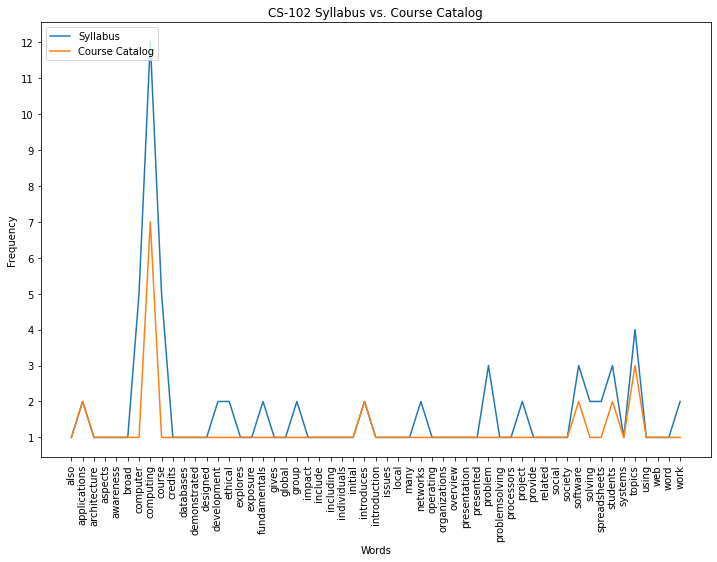

67
94


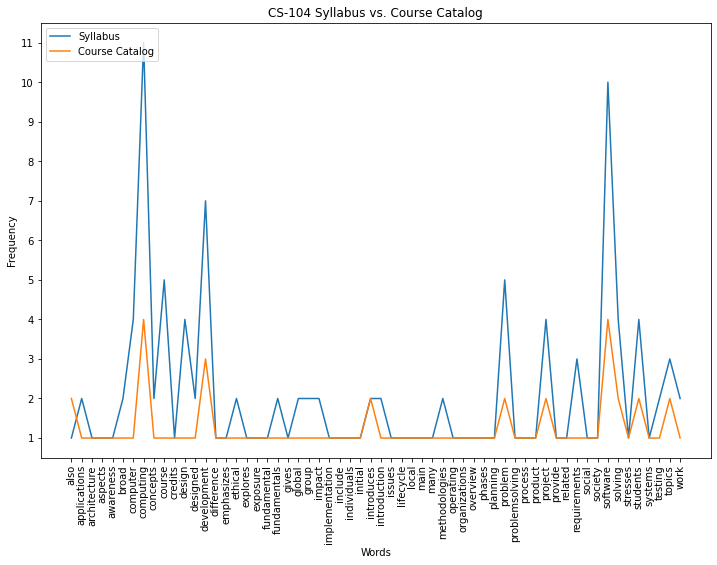

75
126


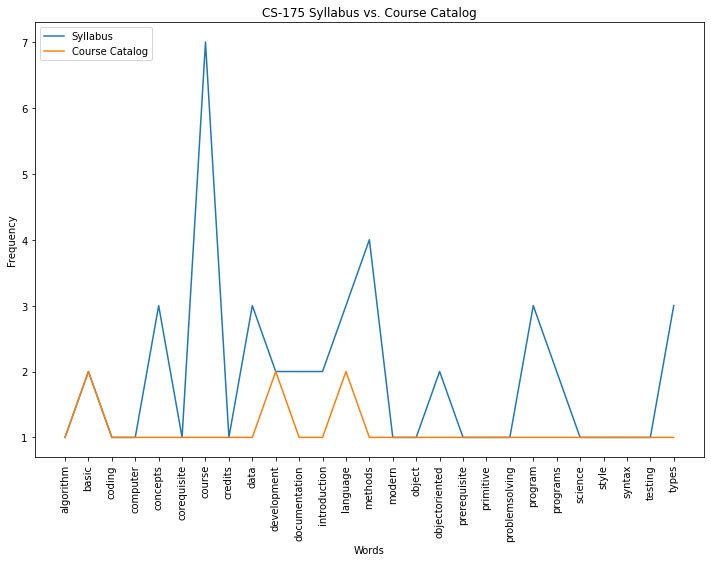

30
52


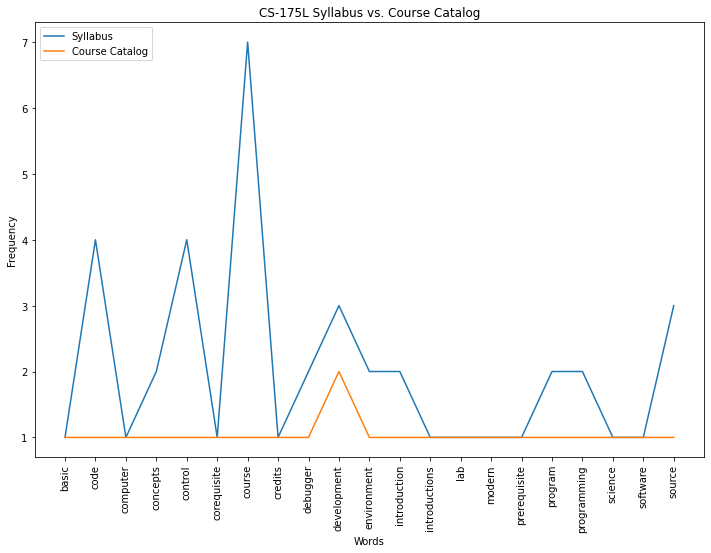

22
43


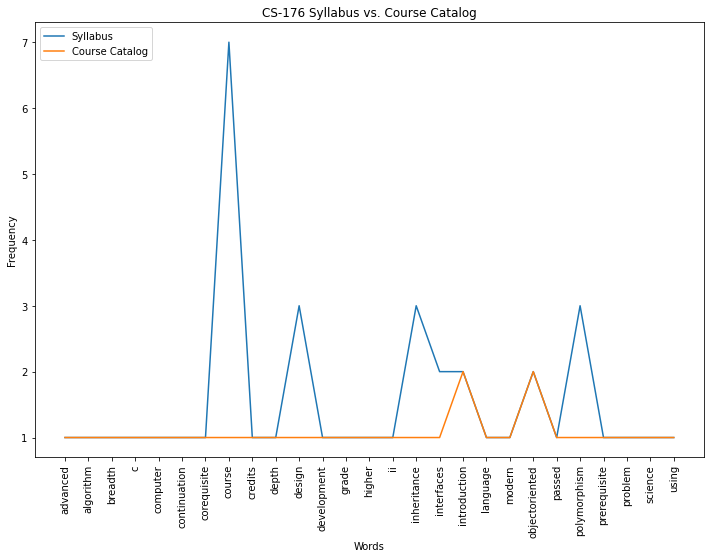

29
42


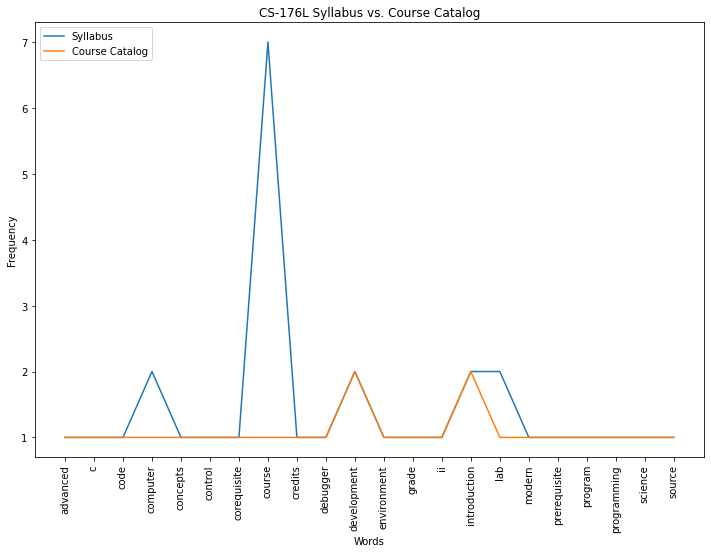

24
32


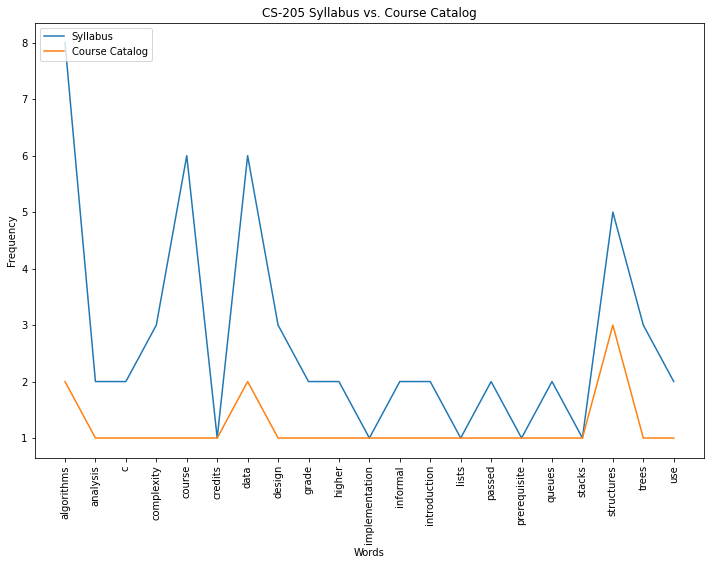

25
57


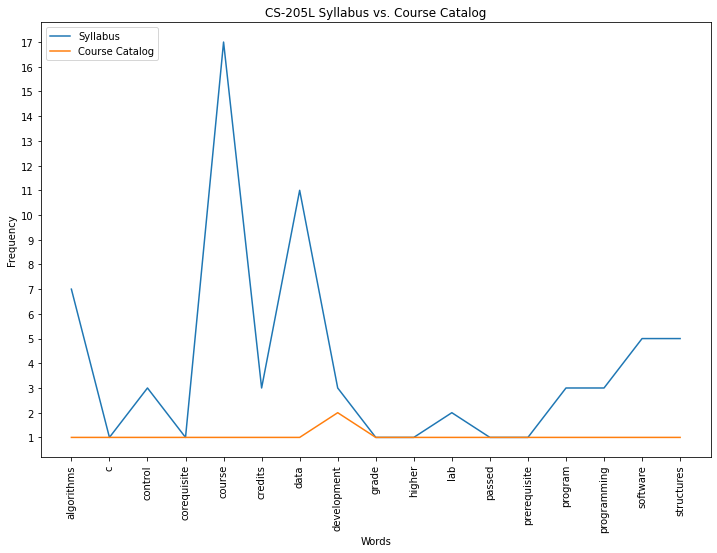

18
68


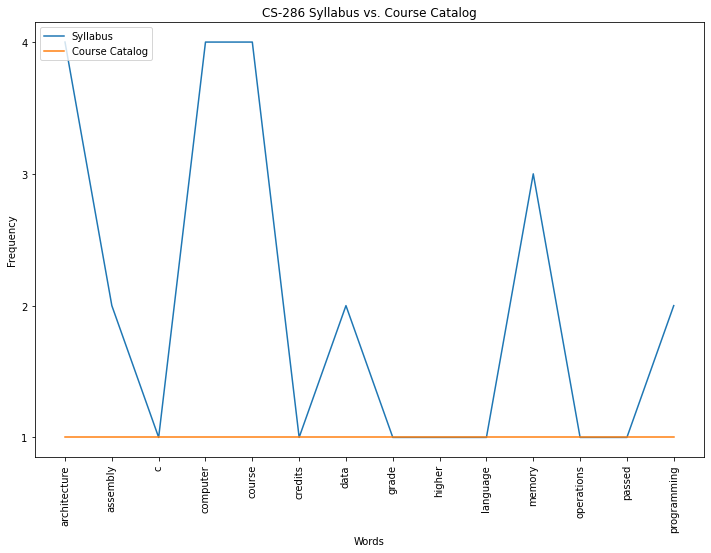

14
28


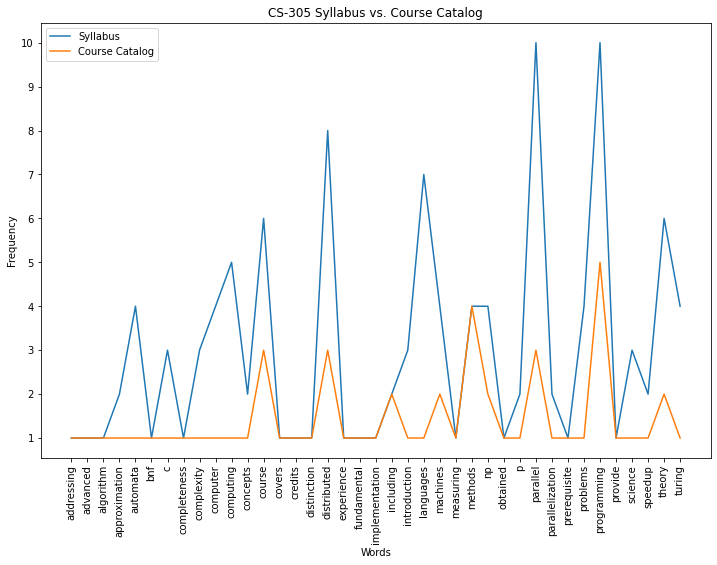

56
119


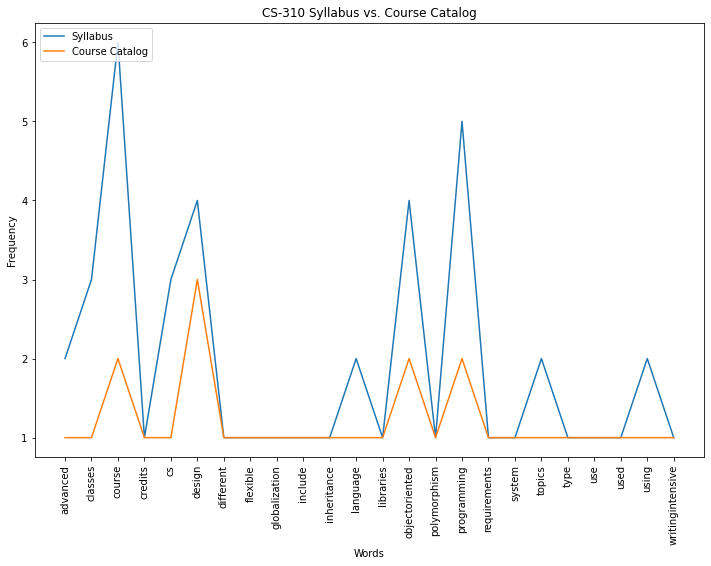

29
47


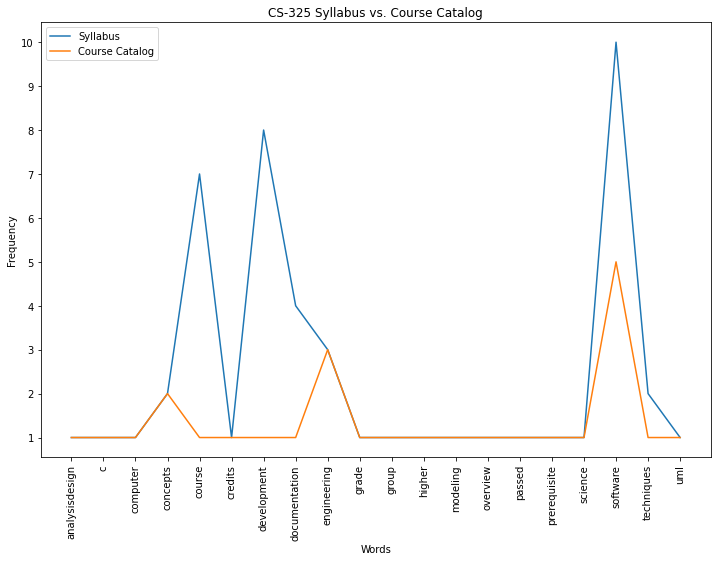

27
49


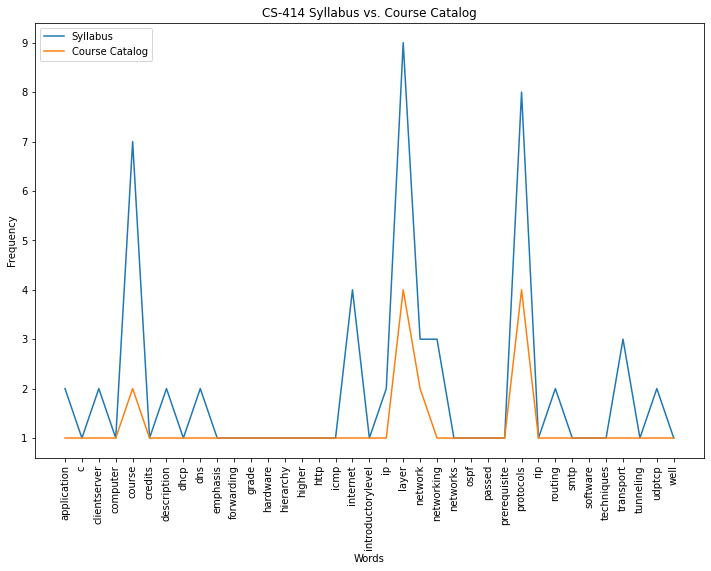

45
74


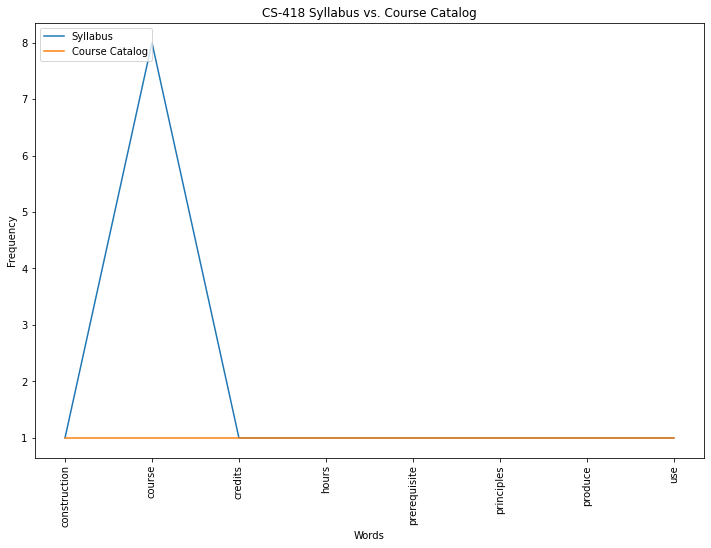

8
15


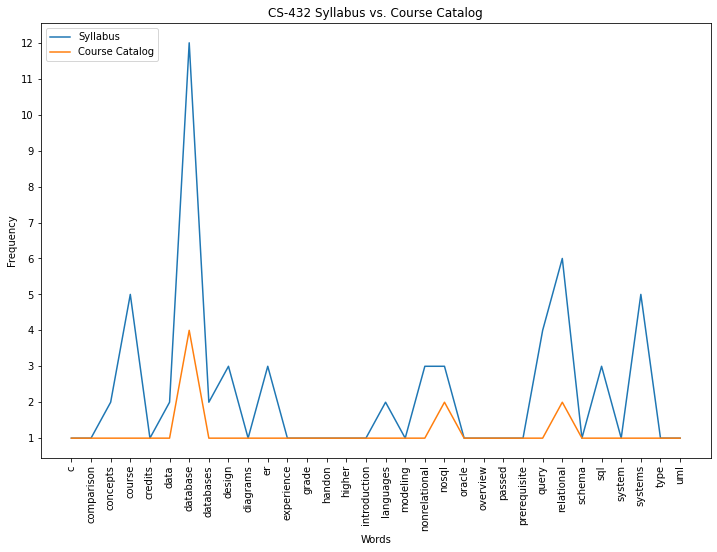

37
73


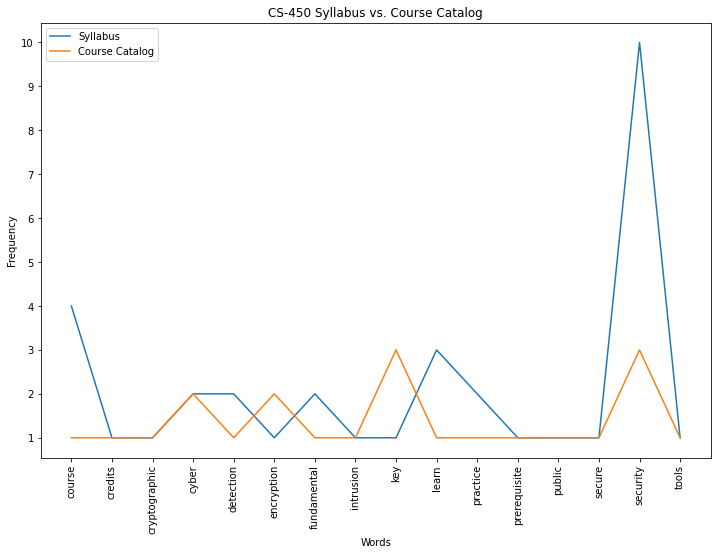

22
34


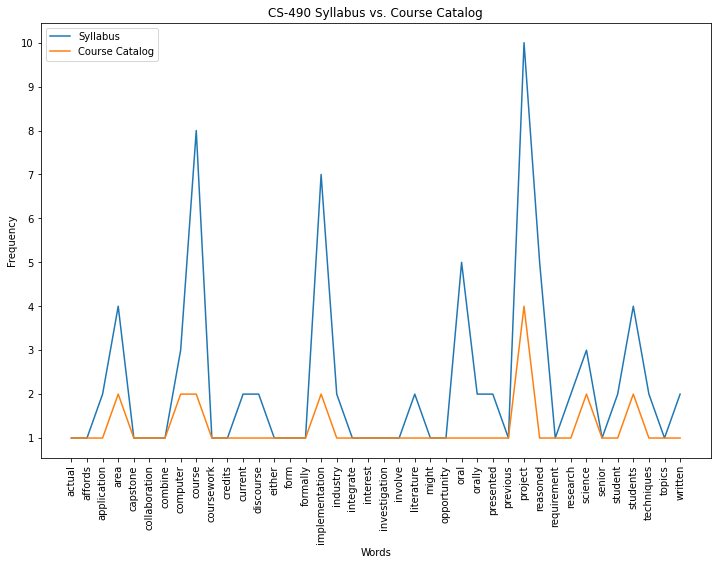

49
91


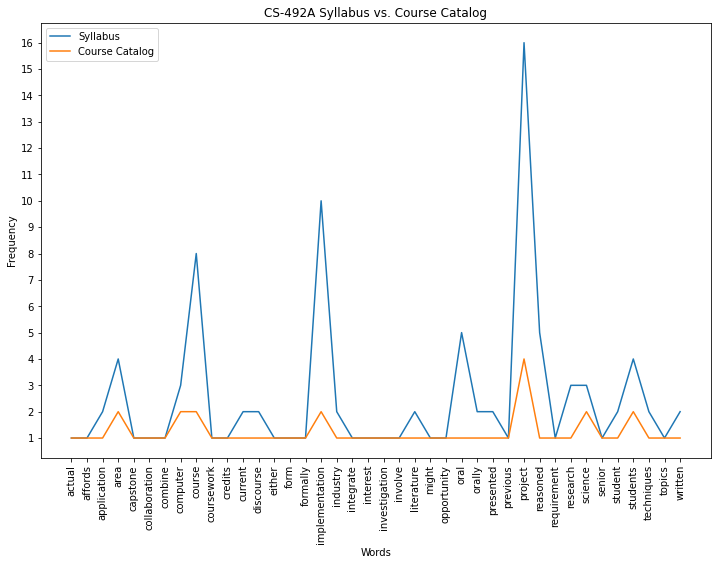

49
101


In [17]:
#COURSE CATALOG
cataURL = "https://raw.githubusercontent.com/annanardelli/SRP2021/main/UndergraduateCourseCatalog.txt"
cataPage = requests.get(cataURL)
cataData = cataPage.text
cataData = cataData.splitlines()

descList = []
course = 0
for index, item in enumerate(cataData):
    #print(index, item)
    if item.startswith(courses[course]):
        if ("Credits: " in cataData[index + 1]) or ("Credits: " in cataData[index]):
            descList.append(desc(cataData, index)) 
        if course < (len(courses) - 2):
            course += 1

count = -1
courseLength = len(courses)
for i in range(courseLength):
    count += 1
    wordFrequency(sylList[i],descList[i],"cc",count)